Habitat Complexity

In [37]:
import pandas as pd

df = pd.read_csv('../data/Benthos-Habitat-Complexity-25-26-6-83.csv')
df.head()



,Sample Id,Category,Seagrass Wt (gms),HA,Co,AMA,AMB,AMC,AMD,AME,AMF,AMG,AM?,CU,IS,CAP,PN
0,1a,Dense,0.862,NaN,NaN,13,0,6,6,6,2,2,2,2.0,NaN,16.0,4
1,1b,Dense,1.204,NaN,NaN,13,1,0,2,0,8,1,1,2.0,NaN,9.0,2
2,1c,Dense,0.800,NaN,NaN,6,0,0,1,0,3,1,2,2.0,NaN,11.0,8
3,1d,Dense,NaN,1.0,0.0,19,0,0,3,0,5,1,1,5.0,0.0,8.0,4
4,2a,Sparse,0.136,NaN,NaN,20,4,0,14,0,2,2,9,NaN,NaN,1.0,7


There are a number of columns where the counts are mainly zero. Remove these to reduce noise. These columns are HA, Co, and IS.

For the remaining columns where there are NaNs replace these with the means of the Category column

In [40]:
# remove clumns where count are mainly zero
df1 = df.drop(['HA', 'Co', 'IS'], axis=1)

#For columns where there are NaNs replace with means of category
df2 = df1
df2['Seagrass Wt (gms)'] = df1['Seagrass Wt (gms)'].fillna(df1['Seagrass Wt (gms)'].mean())
df2['CU'] = df1['CU'].fillna(df1['CU'].mean())
df2['CAP'] = df1['CAP'].fillna(df1['CAP'].mean())

df2.head()

,Sample Id,Category,Seagrass Wt (gms),AMA,AMB,AMC,AMD,AME,AMF,AMG,AM?,CU,CAP,PN
0,1a,Dense,0.862000,13,0,6,6,6,2,2,2,2.000,16.0,4
1,1b,Dense,1.204000,13,1,0,2,0,8,1,1,2.000,9.0,2
2,1c,Dense,0.800000,6,0,0,1,0,3,1,2,2.000,11.0,8
3,1d,Dense,0.393778,19,0,0,3,0,5,1,1,5.000,8.0,4
4,2a,Sparse,0.136000,20,4,0,14,0,2,2,9,2.125,1.0,7


Remove the sample id and change the matrix of counts into a table structure

In [39]:
df3 = df2.drop(['Sample Id'], axis=1)
df4 = df3.melt(id_vars=['Category', 'Seagrass Wt (gms)'], var_name='Species', value_name='Count')

df4.head()

,Category,Seagrass Wt (gms),Species,Count
0,Dense,0.862000,AMA,13.0
1,Dense,1.204000,AMA,13.0
2,Dense,0.800000,AMA,6.0
3,Dense,0.393778,AMA,19.0
4,Sparse,0.136000,AMA,20.0


Create a pivot table suitable for creation of a heatmap of species abundence versus estimated seagrass density. This pivot table uses the aggregation function of sum which will show the total abundance for sample with a specific category. 

Other approach might need to consider the mean value of abundance. In addition is there a need to scale the abundence of each species to be a proprortion of the total abundance.

In [26]:
df5 = df4.drop(['Seagrass Wt (gms)'], axis=1)
df5['Category'] = df5['Category'].replace({'Medium-Dense': 'Dense-Medium'})
df5 = df5.pivot_table(index="Category", columns="Species", values="Count", aggfunc="sum")

df5


Species,AM?,AMA,AMB,AMC,AMD,AME,AMF,AMG,CAP,CU,PN
Category,,,,,,,,,,,
Dense,6.0,51.0,1.0,6.0,12.0,6.0,18.0,5.0,44.000000,11.000,18.0
Dense-Medium,7.0,63.0,13.0,6.0,39.0,1.0,0.0,1.0,33.000000,3.000,15.0
Medium,5.0,51.0,5.0,2.0,6.0,1.0,1.0,4.0,19.000000,6.125,27.0
Medium-Sparse,4.0,87.0,64.0,1.0,30.0,2.0,11.0,1.0,56.000000,7.000,3.0
Sparse,10.0,89.0,70.0,2.0,40.0,0.0,9.0,17.0,15.833333,13.250,23.0


<AxesSubplot:xlabel='Species', ylabel='Category'>

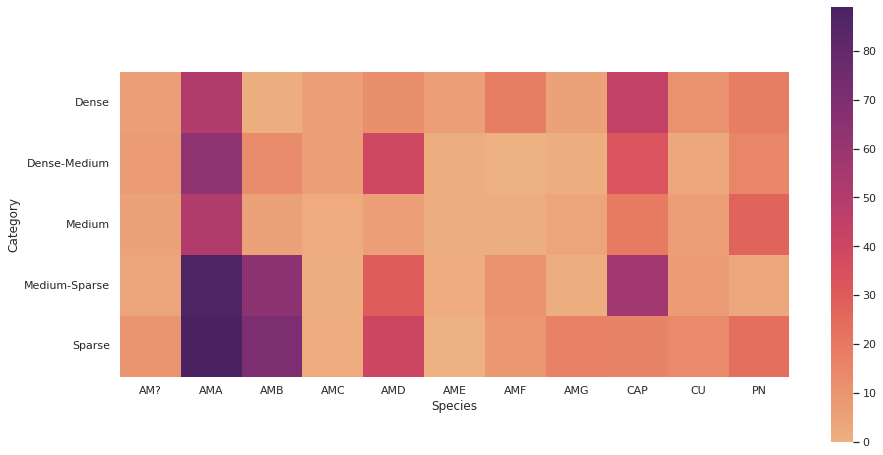

In [35]:
import seaborn as sns

sns.set(rc = {'figure.figsize': (15,8)})
sns.heatmap(df5, cmap='flare', square=True)